# Data Exploration and Visualization 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read data
df = pd.read_csv(r'./data/NY_Taxi_Rich.csv')

In [3]:
pd.set_option('max_columns', None)
df.head()
pd.set_option('max_columns', 20)

### Visualizing data on a NYC Map

In [4]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


def plot_on_ny_map(df, points=10, figsize=(12,12), save=False, title='NYC data', fname='plot.png', cols=['startLongitude', 'startLatitude'], colored=False, color_col=None):
    data_x = df[cols[0]][:points]
    data_y = df[cols[1]][:points]

    ny = gpd.read_file(gpd.datasets.get_path('nybb'))
    geometry = [Point(x, y) for x, y in zip(data_x, data_y)]
    crs = 'EPSG:4326'
    
    gdf = GeoDataFrame(df[[cols[0], cols[1]]][:points], crs=crs, geometry=geometry)
    
    fig, ax = plt.subplots(figsize = (12,12))
    ax.set_title(title)
    ny.to_crs(epsg=4326).plot(ax=ax, color='lightgrey', edgecolor='black')
    
    if colored:
        if color_col is None:
            raise Exception("color_col arg is missing, but colored is set to True.")
            return
        gdf.plot(ax=ax, c=df[color_col])
    else:
        gdf.plot(ax=ax)
    
    if save:
        plt.savefig(fname)
    else:
        plt.show()

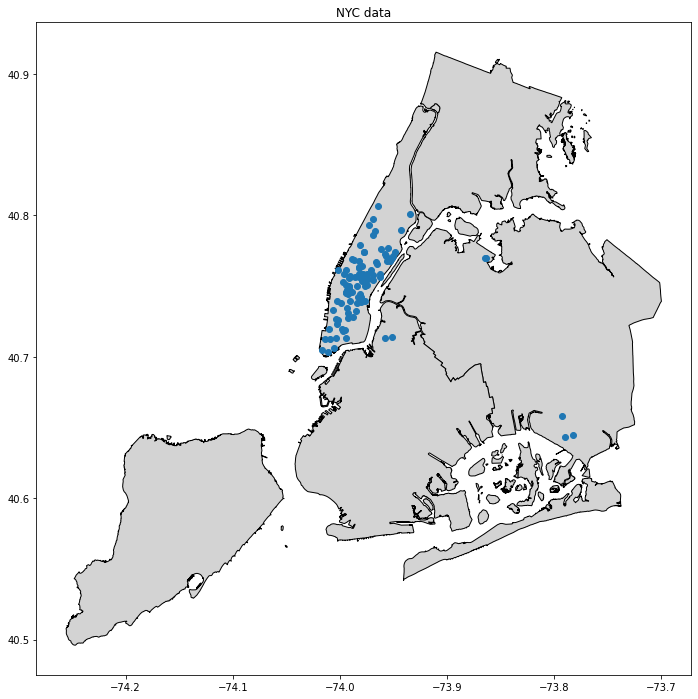

In [5]:
plot_on_ny_map(df, points=100)